In [12]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean keywords

In [13]:
pathfire='/content/disaster_tweets.csv'
df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


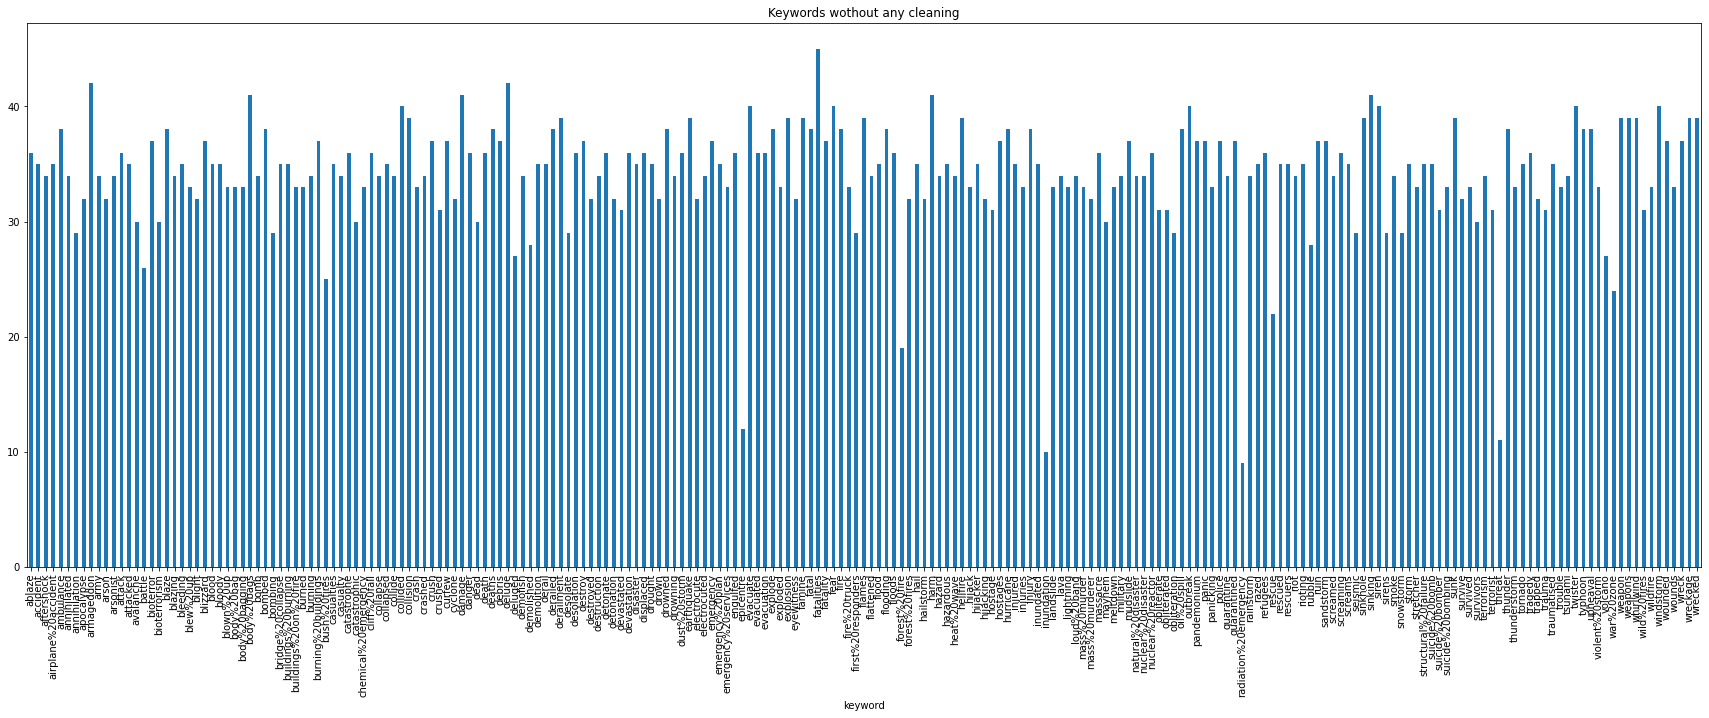

In [15]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

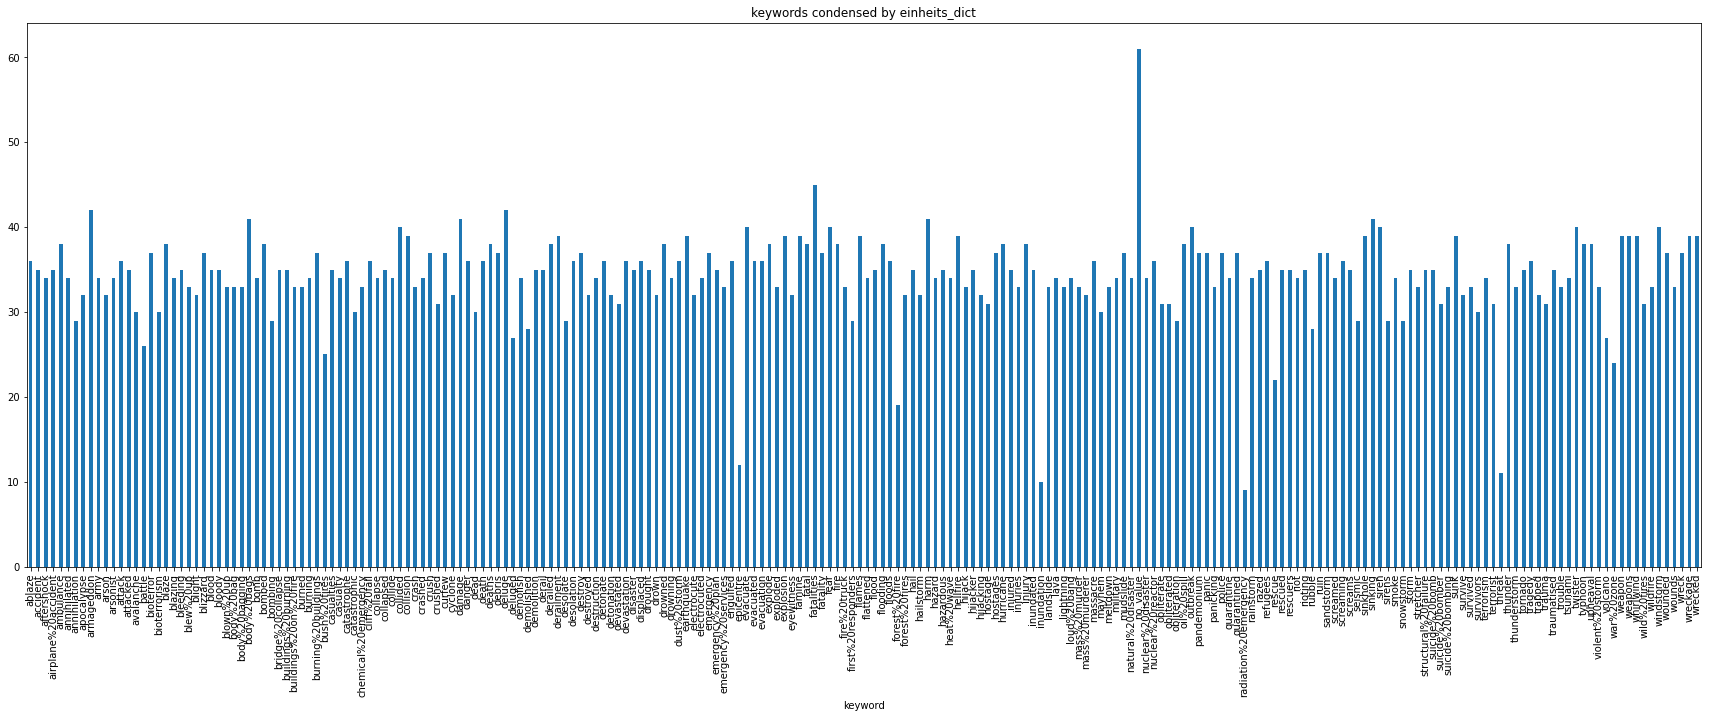

In [16]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

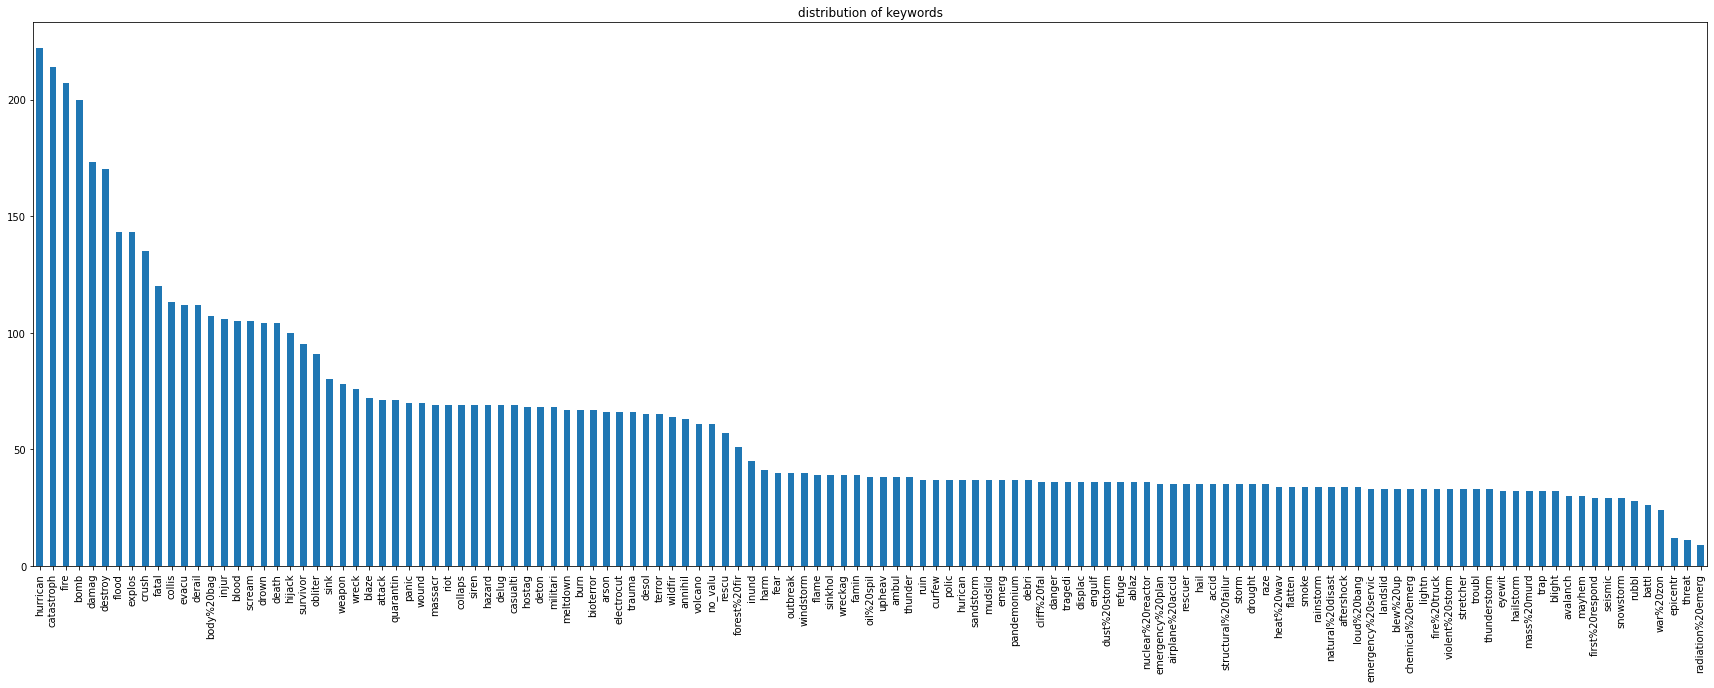

In [17]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

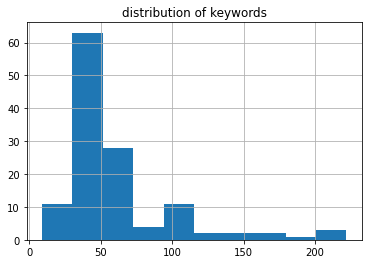

In [18]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

In [19]:
df.location.unique()

array(['no_value', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [20]:
df.location.nunique()

3342

In [21]:
df['location'].value_counts()

no_value                         2533
USA                               104
New York                           71
United States                      50
London                             45
                                 ... 
san gabriel la union                1
On the court                        1
the burrow                          1
Fresno                              1
Cuernavaca, Morelos, MÌ©xico.       1
Name: location, Length: 3342, dtype: int64

In [22]:
# no action for location until requested


### clean text

In [23]:
# text cleaning

df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [24]:
# erase punctuation

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())

  text = text.lower()

  return text

In [25]:

df['clean']=df['text'].apply(lambda text: clean_text(text))

In [26]:
'''
# tokenize

tokenizer = nltk.tokenize.WordPunctTokenizer()

df['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))
'''

"\n# tokenize\n\ntokenizer = nltk.tokenize.WordPunctTokenizer()\n\ndf['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))\n"

In [27]:
df['clean']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to 'shelter in place' are ...
3       people receive wildfires evacuation orders in ...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m utc km s of volcano hawaii http t co zdtoyd ebj
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: clean, Length: 7613, dtype: object

In [28]:
# stemmer & stopwords

my_stopwords = stopwords.words('english')

df["clean"] = df["clean"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))

In [29]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(X_train)

In [31]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegression())
cross_val_score(pipe_tfidf, X_train, y_train).mean()

0.78752052545156

In [33]:
pipe_count = make_pipeline(CountVectorizer(),LogisticRegression())
cross_val_score(pipe_count, X_train, y_train).mean()

0.7898193760262726

Text(0.5, 1.0, 'pred for countV & LogReg')

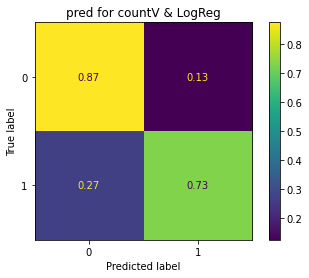

In [34]:
from sklearn.metrics import plot_confusion_matrix

pipe_count.fit(X_train, y_train)
plot_confusion_matrix(pipe_count,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')


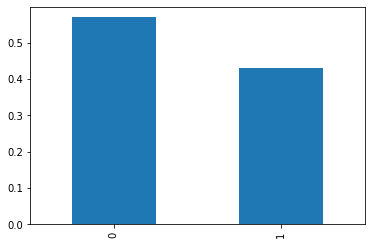

In [35]:
# distribution of y

df.target.value_counts(normalize=True).plot(kind='bar')

### new approach: Day2

In [36]:
!pip install xgboost

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
pipe_tfidf_xgb = make_pipeline(TfidfVectorizer(),XGBClassifier())
cross_val_score(pipe_tfidf_xgb, X_train, y_train).mean()

0.7334975369458128

In [53]:
import numpy as np

param_grid = {
    "XGB__n_estimators": [50, 100],
    "XGB__max_depth": [5, 10, 25],
    "XGB__reg_alpha": [1, 1.3, 2],
    "XGB__reg_lamba": [1, 1.3, 2],
    "XGB__subsample": np.arange(0.8, 1.1, 0.2)
}

In [ ]:
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('XGB', XGBClassifier())])


#xgbc = XGBClassifier()
gridsearch = RandomizedSearchCV(pipe, param_grid, verbose=1, n_jobs=-1, n_iter= 3)
gridsearch.fit(X_train, y_train)

gridsearch.best_score_

In [55]:

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


pipe = Pipeline(steps=[('tfidf', TfidfVectorizer()), ('XGB', XGBClassifier())])


#xgbc = XGBClassifier()
rgridsearch = RandomizedSearchCV(pipe, param_grid, verbose=1, n_jobs=-1, n_iter= 3)
rgridsearch.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('tfidf',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                                    

In [56]:
rgridsearch.best_score_

0.7650246305418719